In [1]:
import json
import requests
import pandas as pd
from PIL import Image 
from IPython.display import display
from IPython.display import Image
from IPython.core.display import HTML 

In [2]:
URL = "https://data.scryfall.io/default-cards/default-cards-20231207220637.json"
full_scryfall_df = pd.DataFrame(json.loads(requests.get(URL).text))
full_scryfall_df.head()

,object,id,oracle_id,multiverse_ids,mtgo_id,mtgo_foil_id,tcgplayer_id,cardmarket_id,name,lang,...,tcgplayer_etched_id,flavor_name,attraction_lights,color_indicator,printed_type_line,printed_text,variation_of,life_modifier,hand_modifier,content_warning
0,card,0000579f-7b35-4ed3-b44c-db2a538066fe,44623693-51d6-49ad-8cd7-140505caf02f,[109722],25527.0,25528.0,14240.0,13850.0,Fury Sliver,en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,card,00006596-1166-4a79-8443-ca9f82e6db4e,8ae3562f-28b7-4462-96ed-be0cf7052ccc,[189637],34586.0,34587.0,33347.0,21851.0,Kor Outfitter,en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,card,0000a54c-a511-4925-92dc-01b937f9afad,dc4e2134-f0c2-49aa-9ea3-ebf83af1445c,[],NaN,NaN,98659.0,NaN,Spirit,en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,card,0000cd57-91fe-411f-b798-646e965eec37,9f0d82ae-38bf-45d8-8cda-982b6ead1d72,[435231],65170.0,65171.0,145764.0,301766.0,Siren Lookout,en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,card,00012bd8-ed68-4978-a22d-f450c8a6e048,5aa12aff-db3c-4be5-822b-3afdf536b33e,[1278],NaN,NaN,1623.0,5664.0,Web,en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Image(url= full_scryfall_df.iloc[0]['image_uris']['small'])

In [59]:
df = full_scryfall_df[['name',                       # the name of the card - not technically necessary but helpful for debugging
                       'mana_cost',                  # what type of mana the card costs to summon
                       'cmc',                        # how much mana the card costs
                       'type_line',                  # the type of the card (creature, sorcery, etc)
                       'oracle_text',                # what the card does
                       'power', 'toughness',         # the strength of the card if it's a creature
                       'colors', 'color_identity',   # more info on what type of mana the card costs
                       'keywords',                   # the keywords on the card (more on this later)
                       'image_uris',
                       'set', 'released_at',         # when the card was released
                       'rarity',                     # how much the card was printed
                       'games',                      # games tells if it is legal online or in paper (we exclude online-only cards)
                       'legalities']]                # which formats the card is legal in

In [60]:
df.head()

,name,mana_cost,cmc,type_line,oracle_text,power,toughness,colors,color_identity,keywords,image_uris,set,released_at,rarity,games,legalities
0,Fury Sliver,{5}{R},6.0,Creature — Sliver,All Sliver creatures have double strike.,3,3,[R],[R],[],{'small': 'https://cards.scryfall.io/small/fro...,tsp,2006-10-06,uncommon,"[paper, mtgo]","{'standard': 'not_legal', 'future': 'not_legal..."
1,Kor Outfitter,{W}{W},2.0,Creature — Kor Soldier,"When Kor Outfitter enters the battlefield, you...",2,2,[W],[W],[],{'small': 'https://cards.scryfall.io/small/fro...,zen,2009-10-02,common,"[paper, mtgo]","{'standard': 'not_legal', 'future': 'not_legal..."
2,Spirit,,0.0,Token Creature — Spirit,Flying,1,1,[W],[W],[],{'small': 'https://cards.scryfall.io/small/fro...,tmm2,2015-05-22,common,[paper],"{'standard': 'not_legal', 'future': 'not_legal..."
3,Siren Lookout,{2}{U},3.0,Creature — Siren Pirate,Flying\nWhen Siren Lookout enters the battlefi...,1,2,[U],[U],[Explore],{'small': 'https://cards.scryfall.io/small/fro...,xln,2017-09-29,common,"[arena, paper, mtgo]","{'standard': 'not_legal', 'future': 'not_legal..."
4,Web,{G},1.0,Enchantment — Aura,Enchant creature (Target a creature as you cas...,NaN,NaN,[G],[G],[],{'small': 'https://cards.scryfall.io/small/fro...,3ed,1994-04-01,rare,[paper],"{'standard': 'not_legal', 'future': 'not_legal..."


In [61]:
df['creature'] = df['type_line'].apply(lambda s: isinstance(s, str) and 'Creature' in s)

/var/folders/my/xjpgt3ss01991yghb67xgjs80000gn/T/ipykernel_76488/2989736981.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['creature'] = df['type_line'].apply(lambda s: isinstance(s, str) and 'Creature' in s)


In [62]:
df = df[df['creature'] == True]

In [63]:
df['volo'] = df['color_identity'].apply(lambda l: ('R' not in l and 'W' not in l and 'B' not in l))

In [64]:
df = df[df['volo'] == True]

In [65]:
df['keruga'] = df['cmc'].apply(lambda i: i >= 3)
df = df[df['keruga'] == True]

In [66]:
df.head()

,name,mana_cost,cmc,type_line,oracle_text,power,toughness,colors,color_identity,keywords,image_uris,set,released_at,rarity,games,legalities,creature,volo,keruga
3,Siren Lookout,{2}{U},3.0,Creature — Siren Pirate,Flying\nWhen Siren Lookout enters the battlefi...,1,2,[U],[U],[Explore],{'small': 'https://cards.scryfall.io/small/fro...,xln,2017-09-29,common,"[arena, paper, mtgo]","{'standard': 'not_legal', 'future': 'not_legal...",True,True,True
6,Obyra's Attendants // Desperate Parry,{4}{U} // {1}{U},5.0,Creature — Faerie Wizard // Instant — Adventure,NaN,3,4,[U],[U],[],{'small': 'https://cards.scryfall.io/small/fro...,woe,2023-09-08,common,"[paper, arena, mtgo]","{'standard': 'legal', 'future': 'legal', 'hist...",True,True,True
9,Mystic Skyfish,{2}{U},3.0,Creature — Fish,"Whenever you draw your second card each turn, ...",3,1,[U],[U],[],{'small': 'https://cards.scryfall.io/small/fro...,m21,2020-07-03,common,"[arena, paper, mtgo]","{'standard': 'not_legal', 'future': 'not_legal...",True,True,True
14,Bronze Horse,{7},7.0,Artifact Creature — Horse,Trample\nAs long as you control another creatu...,4,4,[],[],[],{'small': 'https://cards.scryfall.io/small/fro...,me4,2011-01-10,uncommon,[mtgo],"{'standard': 'not_legal', 'future': 'not_legal...",True,True,True
18,Whiptongue Hydra,{5}{G},6.0,Creature — Lizard Hydra,Reach\nWhen Whiptongue Hydra enters the battle...,4,4,[G],[G],[],{'small': 'https://cards.scryfall.io/small/fro...,c18,2018-08-09,rare,[paper],"{'standard': 'not_legal', 'future': 'not_legal...",True,True,True


In [68]:
types = set()
for index, row in df.iterrows():
    t = set(row['type_line'].split("—")[1].split())
    types |= t
# len(types)
types = sorted(list(types))

In [69]:
df = df.sort_values(by=['released_at', 'name'])
df = df.drop_duplicates(subset=['name'])

In [70]:
df[df['name'].apply(lambda i: 'Battlesphere' in i)]

,name,mana_cost,cmc,type_line,oracle_text,power,toughness,colors,color_identity,keywords,image_uris,set,released_at,rarity,games,legalities,creature,volo,keruga
62227,Myr Battlesphere,{7},7.0,Artifact Creature — Myr Construct,"When Myr Battlesphere enters the battlefield, ...",4,7,[],[],[],{'small': 'https://cards.scryfall.io/small/fro...,som,2010-10-01,rare,"[paper, mtgo]","{'standard': 'not_legal', 'future': 'not_legal...",True,True,True


In [72]:
types

['//',
 'Advisor',
 'Alien',
 'Ally',
 'Angel',
 'Antelope',
 'Ape',
 'Archer',
 'Artifact',
 'Artificer',
 'Assassin',
 'Assembly-Worker',
 'Astartes',
 'Atog',
 'Aurochs',
 'Avatar',
 'Background',
 'Badger',
 'Barbarian',
 'Bard',
 'Basilisk',
 'Bear',
 'Beast',
 'Beaver',
 'Beeble',
 'Berserker',
 'Bird',
 'Boar',
 'Brushwagg',
 'Camel',
 'Cat',
 'Centaur',
 'Cephalid',
 'Chicken',
 'Chimera',
 'Citizen',
 'Clamfolk',
 'Cleric',
 'Clown',
 'Cockatrice',
 'Construct',
 'Cow',
 'Crab',
 'Creature',
 'Crocodile',
 'Cyberman',
 'Cyborg',
 'Deer',
 'Demigod',
 'Demon',
 'Designer',
 'Detective',
 'Dinosaur',
 'Djinn',
 'Doctor',
 'Dog',
 'Donkey',
 'Dragon',
 'Drake',
 'Dreadnought',
 'Drone',
 'Druid',
 'Dryad',
 'Dwarf',
 'Efreet',
 'Egg',
 'Elder',
 'Eldrazi',
 'Elemental',
 'Elemental?',
 'Elephant',
 'Elf',
 'Elk',
 'Elves',
 'Employee',
 'Enchantment',
 'Equipment',
 'Eye',
 'Faerie',
 'Fish',
 'Food',
 'Fox',
 'Fractal',
 'Frog',
 'Fungus',
 'Gamer',
 'Gargoyle',
 'Giant',
 'Gnom

FOR TYPE Employee


4it [00:00,  6.78it/s]


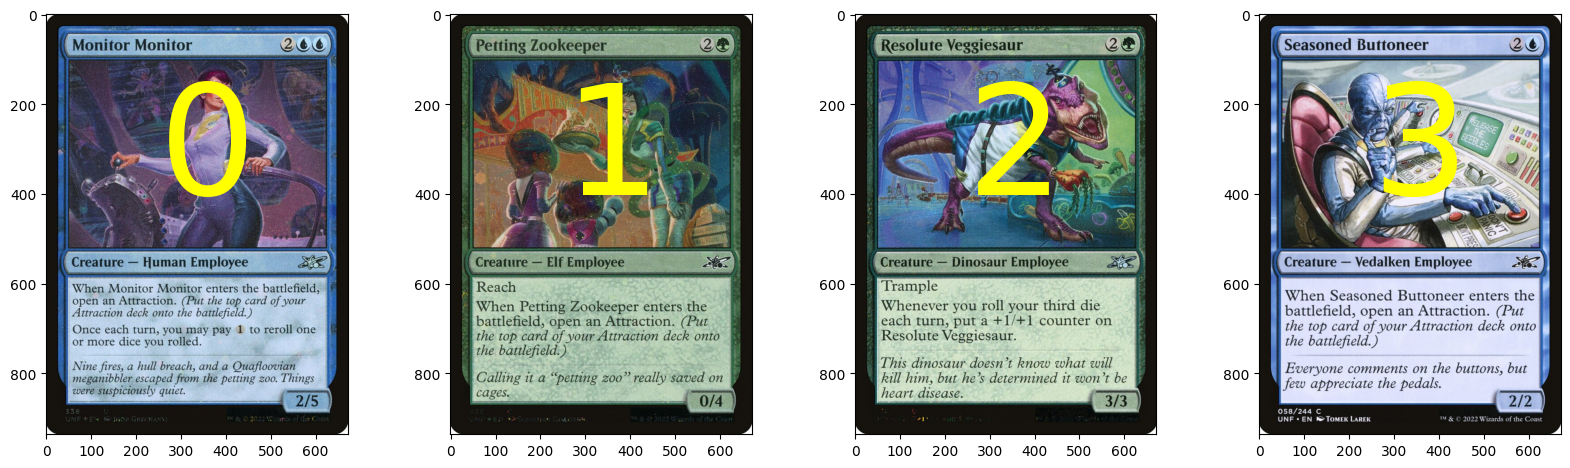

KeyboardInterrupt: Interrupted by user

In [76]:
chosen = []
with open("rows.txt", "r") as r:
    for line in r.readlines():
        chosen.append(line.strip())
from skimage import io
import tqdm
import matplotlib.pyplot as plt
from IPython.display import clear_output
columns = 4
for type_idx, t in enumerate(types[1:]):
# if True:
    # t = 'Nymph'
    if type_idx < len(chosen):
        continue
    if t == 'Creature':
        chosen.append('none - creature')
        continue
    type_df = df[df['type_line'].apply(lambda ts: t in ts)]
    images = []
    print("FOR TYPE", t)
    for idx, row in tqdm.tqdm(type_df.iterrows()):
        url = row['image_uris']
        if not isinstance(url, dict):
            continue
        url = url['large']
        image = io.imread(url)
        images.append(image)
        # plt.imshow(image)
    plt.figure(figsize=(20,(len(images) // 4 + 1) * 6))
    for i, image in enumerate(images):
        ax = plt.subplot(len(images) // columns + 1, columns, i + 1)
        ax.text(250, 400, str(i), color='yellow', fontsize=110)
        plt.imshow(image)
    plt.show()
    idx = input("Which one? ")
    chosen.append(idx)
    with open("rows.txt", "w") as r:
        for idx in chosen:
            r.write(f"{idx}\n")
    clear_output()